# Tutorial
## Rocks - Granite

In [9]:
import os, sys
currentdir = os.path.dirname(os.path.realpath("Tutorial_Rocks-Granite.ipynb"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

# MODULES
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules import sequences
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# Test felsic rock generation within Plutonite class
data = sequences.Plutonite()
data_rock = data.create_felsic(thickness=500)

data = sequences.DataProcessing(dataset=data_rock)
rock_name = data.extract_lithology(type="rock")
thickness = data.extract_thickness(type="rock")
top = data.extract_top(type="rock")
bottom = data.extract_bottom(type="rock")
elements = data.extract_elements(type="rock")
mineralogy = data.extract_mineralogy(type="rock")
density_bulk = data.extract_densities(type="rock", keyword="bulk")
elastic_bulk = data.extract_elastic_moduli(type="rock", keyword="bulk")
elastic_mu = data.extract_elastic_moduli(type="rock", keyword="poisson")
vP = data.extract_seismic_velocities(type="rock", keyword="vP")
vS = data.extract_seismic_velocities(type="rock", keyword="vS")
phi = data.extract_porosity(type="rock")
fluid = data.extract_fluid(type="rock")
gr = data.extract_gamma_ray(type="rock")
pe = data.extract_photoelectricity(type="rock")
amounts_minerals = data.extract_mineral_amounts(type="rock")
amounts_elements = data.extract_element_amounts(type="rock")

df_petro = pd.DataFrame(list(zip(density_bulk, gr, phi*100, pe, vP, vS, elastic_bulk, elastic_mu)), columns=["RHOB", "GR", "PHIN", "PE", "VP", "VS", "K", "POISSON"])
df_mineral = pd.DataFrame(list(zip(amounts_minerals[:, 0], amounts_minerals[:, 1], amounts_minerals[:, 2], amounts_minerals[:, 3], amounts_minerals[:, 4], amounts_minerals[:, 5])), columns=["Qz", "Kfs", "Pl", "Bt", "Ms", "Amph"])



In [3]:
df_petro.describe()

,RHOB,GR,PHIN,PE,VP,VS,K,POISSON
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.63270,84.531318,1.223800,2.309004,6423.815500,3968.516260,53.357080,0.180462
std,0.02555,7.847845,0.741021,0.192659,62.049429,48.805896,0.968245,0.003176
min,2.58300,65.321000,0.000000,2.001000,6265.170000,3826.880000,50.370000,0.173000
25%,2.61400,78.943250,0.600000,2.169000,6381.252500,3942.282500,52.647500,0.179000
50%,2.62800,84.105500,1.200000,2.248000,6425.410000,3971.405000,53.400000,0.180000
75%,2.64700,90.576500,1.900000,2.459000,6472.612500,4004.900000,54.072500,0.182000
max,2.70900,102.593000,2.500000,2.879000,6562.930000,4069.300000,55.810000,0.189000


In [4]:
df_mineral.describe()

,Qz,Kfs,Pl,Bt,Ms,Amph
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.212849,0.428197,0.258818,0.018078,0.051719,0.030339
std,0.008389,0.020386,0.034839,0.014149,0.001697,0.024947
min,0.199800,0.369600,0.187200,0.000000,0.048300,0.000000
25%,0.206175,0.419450,0.236500,0.006100,0.050675,0.011200
50%,0.211300,0.433150,0.264550,0.014100,0.051600,0.021750
75%,0.218725,0.443925,0.284625,0.029275,0.052900,0.047775
max,0.239900,0.456200,0.314200,0.060700,0.055300,0.095800


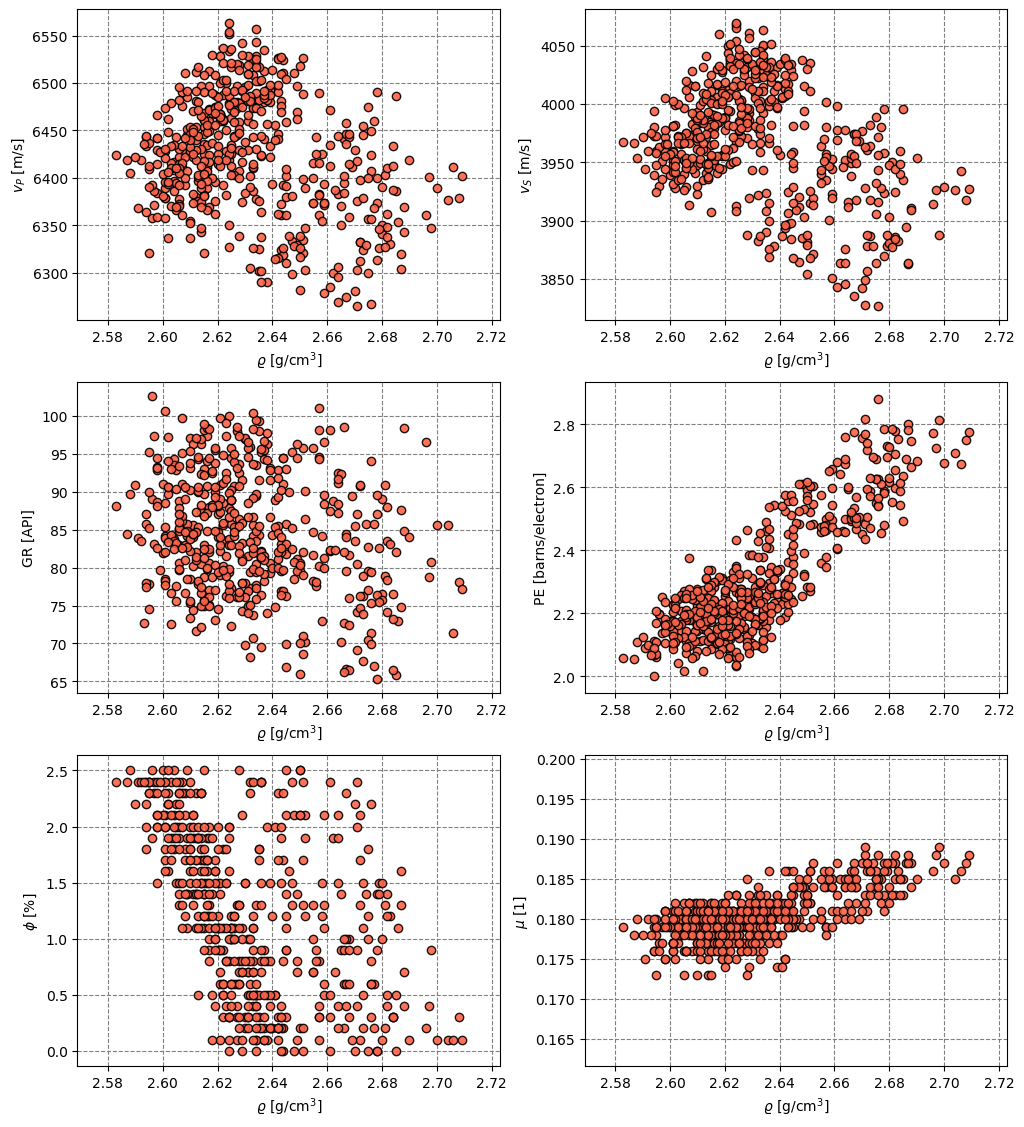

In [5]:
fig, axs = plt.subplots(3, 2, dpi=100, figsize=(12,14))

color_sandstone = "tomato"
for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

axs[0,0].scatter(density_bulk, vP, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
axs[0,1].scatter(density_bulk, vS, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
axs[1,0].scatter(density_bulk, gr, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
axs[1,1].scatter(density_bulk, pe, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("PE [barns/electron]")
axs[2,0].scatter(density_bulk, phi*100, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,0].set_ylabel("$\phi$ [%]")
axs[2,1].scatter(density_bulk, elastic_mu, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,1].set_ylabel("$\mu$ [1]")

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_01.png", bbox_inches="tight")
plt.show()

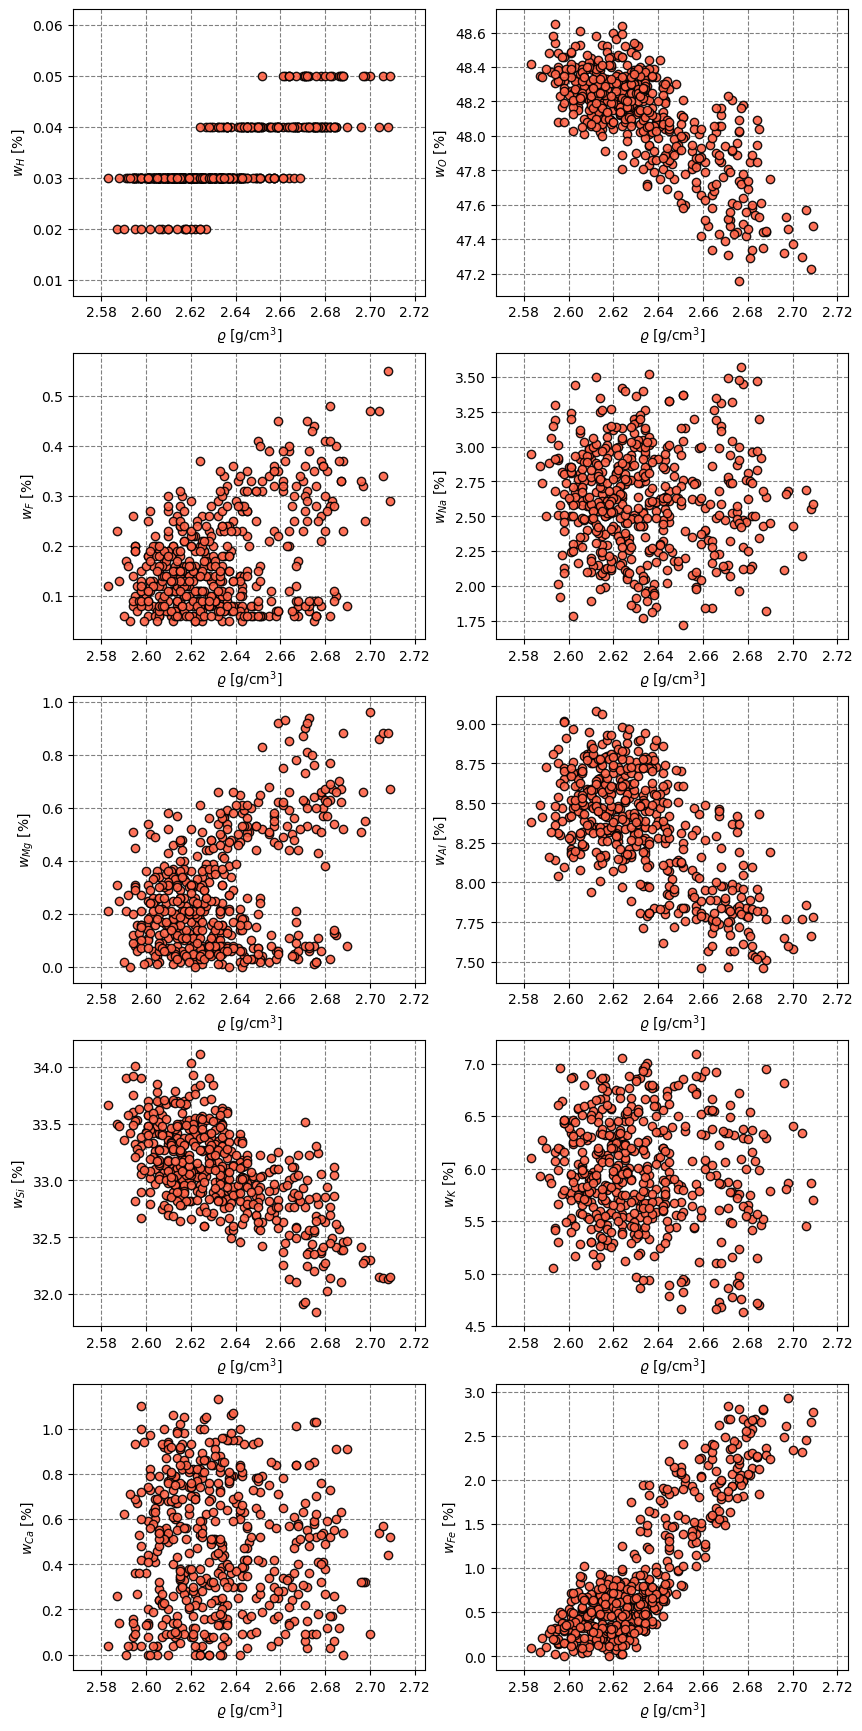

In [6]:
fig, axs = plt.subplots(5, 2, dpi=100, figsize=(10,22))

color_sandstone = "tomato"
for i in range(5):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

axs[0,0].scatter(density_bulk, 100*amounts_elements[:, 0], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$w_{H}$ [%]")
axs[0,1].scatter(density_bulk, 100*amounts_elements[:, 1], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$w_{O}$ [%]")
axs[1,0].scatter(density_bulk, 100*amounts_elements[:, 2], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("$w_{F}$ [%]")
axs[1,1].scatter(density_bulk, 100*amounts_elements[:, 3], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("$w_{Na}$ [%]")
axs[2,0].scatter(density_bulk, 100*amounts_elements[:, 4], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,0].set_ylabel("$w_{Mg}$ [%]")
axs[2,1].scatter(density_bulk, 100*amounts_elements[:, 5], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,1].set_ylabel("$w_{Al}$ [%]")
axs[3,0].scatter(density_bulk, 100*amounts_elements[:, 6], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[3,0].set_ylabel("$w_{Si}$ [%]")
axs[3,1].scatter(density_bulk, 100*amounts_elements[:, 7], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[3,1].set_ylabel("$w_{K}$ [%]")
axs[4,0].scatter(density_bulk, 100*amounts_elements[:, 8], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[4,0].set_ylabel("$w_{Ca}$ [%]")
axs[4,1].scatter(density_bulk, 100*amounts_elements[:, 9], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[4,1].set_ylabel("$w_{Fe}$ [%]")

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_01.png", bbox_inches="tight")
plt.show()

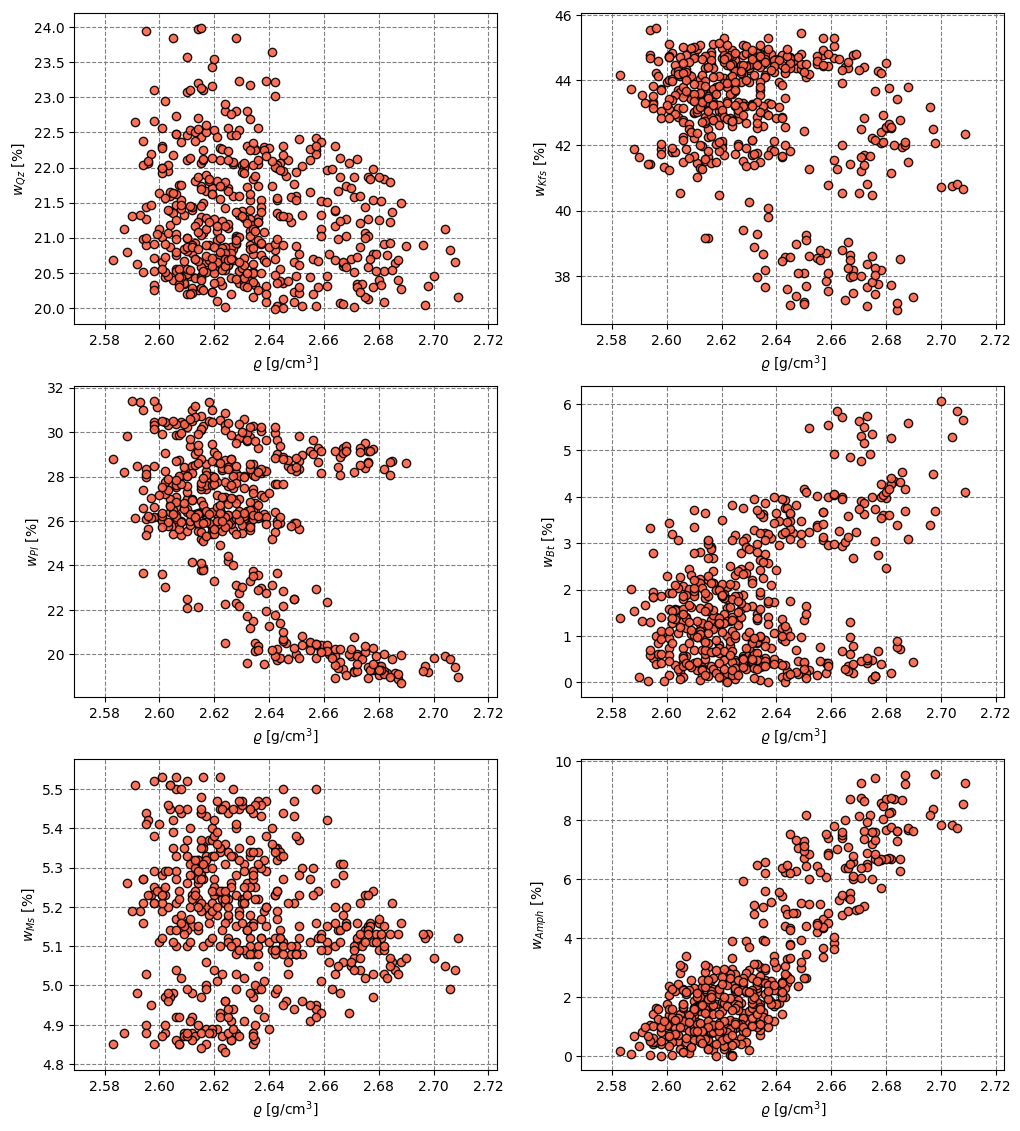

In [7]:
fig, axs = plt.subplots(3, 2, dpi=100, figsize=(12,14))

color_sandstone = "tomato"
for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

axs[0,0].scatter(density_bulk, 100*amounts_minerals[:, 0], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$w_{Qz}$ [%]")
axs[0,1].scatter(density_bulk, 100*amounts_minerals[:, 1], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$w_{Kfs}$ [%]")
axs[1,0].scatter(density_bulk, 100*amounts_minerals[:, 2], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("$w_{Pl}$ [%]")
axs[1,1].scatter(density_bulk, 100*amounts_minerals[:, 3], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("$w_{Bt}$ [%]")
axs[2,0].scatter(density_bulk, 100*amounts_minerals[:, 4], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,0].set_ylabel("$w_{Ms}$ [%]")
axs[2,1].scatter(density_bulk, 100*amounts_minerals[:, 5], color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,1].set_ylabel("$w_{Amph}$ [%]")

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_01.png", bbox_inches="tight")
plt.show()

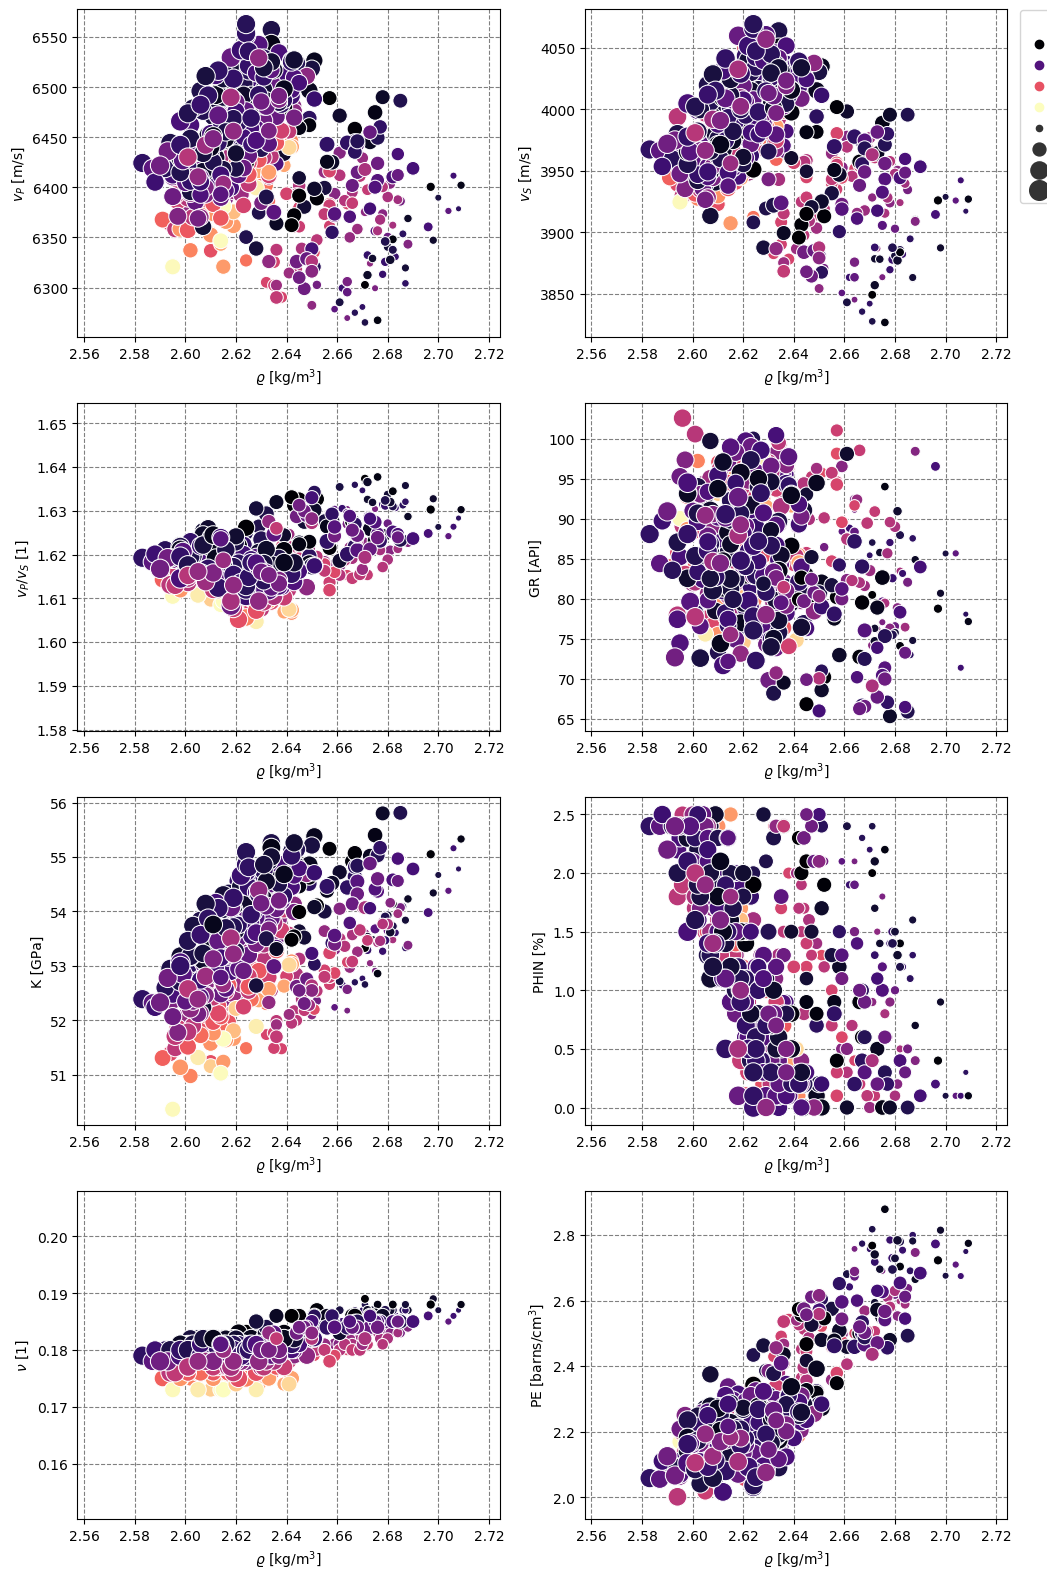

In [37]:
## General Settings
dataset = df_petro
var_x = "RHOB"
var_hue = df_mineral["Qz"]
var_size = df_mineral["Kfs"]+df_mineral["Pl"]
var_sizes = (20, 200)
var_palette = "magma"
##

fig, axs = plt.subplots(4, 2, dpi=100, figsize=(12, 20))

im = sns.scatterplot(ax=axs[0][0], 
                     data=dataset, 
                     x=var_x, 
                     y="VP", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes)
axs[0,0].set_ylabel("$v_P$ [m/s]")
fig.legend(bbox_to_anchor=(0.85, 0.785), loc=2, borderaxespad=0.) #Move the legend outside the plot
im.legend_.remove()
im = sns.scatterplot(ax=axs[0][1], 
                     data=dataset, 
                     x=var_x, 
                     y="VS", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[0,1].set_ylabel("$v_S$ [m/s]")
im = sns.scatterplot(ax=axs[1][0], 
                     data=dataset, 
                     x=var_x, 
                     y=df_petro["VP"]/df_petro["VS"], 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[1,0].set_ylabel("$v_P/v_S$ [1]")
im = sns.scatterplot(ax=axs[1][1], 
                     data=dataset, 
                     x=var_x, 
                     y="GR", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[1,1].set_ylabel("GR [API]")
im = sns.scatterplot(ax=axs[2][0], 
                     data=dataset, 
                     x=var_x, 
                     y="K", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[2,0].set_ylabel("K [GPa]")
im = sns.scatterplot(ax=axs[2][1], 
                     data=dataset, 
                     x=var_x, 
                     y="PHIN", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[2,1].set_ylabel("PHIN [%]")
im = sns.scatterplot(ax=axs[3][0], 
                     data=dataset, 
                     x=var_x, 
                     y="POISSON", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[3,0].set_ylabel("$\\nu$ [1]")
im = sns.scatterplot(ax=axs[3][1], 
                     data=dataset, 
                     x=var_x, 
                     y="PE", 
                     hue=var_hue, palette=var_palette,
                     size=var_size, sizes=var_sizes, 
                     legend=False)
axs[3,1].set_ylabel("PE [barns/cm$^3$]")

for i in range(4):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [kg/m$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

#plt.savefig("Tutorial_Minerals-Olivine_01B.png", dpi=150, bbox_inches="tight")
plt.show()